In [10]:
import json
import numpy as np
import pandas as pd
import datetime as dt
import pytz
import matplotlib.pyplot as plt

In [11]:
timezone = pytz.timezone('America/Sao_Paulo')

In [3]:
with open('dados.json') as f:
    json_data = f.read()
    
data = json.loads(json_data)

In [17]:
df = pd.DataFrame(data)
df["timestamp"] = df["timestamp"].astype(int)
df["TemperaturaC"] = df["TemperaturaC"].astype(float)
df["umidade"] = df["umidade"].astype(float)
df["TemperaturaF"] = df["TemperaturaF"].astype(float)
df["data"] = pd.to_datetime(df["timestamp"], unit="s").dt.tz_localize(pytz.utc).dt.tz_convert(timezone)
df["data"] = df["data"].dt.strftime("%d-%m %H:%M")
print(df.head(10))

   TemperaturaC  TemperaturaF   timestamp  umidade         data
0         23.14         73.67  1684340563    50.70  17-05 13:22
1         22.67         72.86  1684340862    52.37  17-05 13:27
2         23.51         74.36  1684341159    49.29  17-05 13:32
3         22.85         73.21  1684341457    51.48  17-05 13:37
4         23.56         74.47  1684341753    49.62  17-05 13:42
5         23.72         74.74  1684342052    50.27  17-05 13:47
6         23.63         74.65  1684342351    50.39  17-05 13:52
7         23.68         74.66  1684342650    50.33  17-05 13:57
8         22.93         73.31  1684342950    52.50  17-05 14:02
9         23.30         74.05  1684343249    51.64  17-05 14:07


In [13]:
df.describe()

,TemperaturaC,TemperaturaF,timestamp,umidade
count,289.00000,289.000000,2.890000e+02,289.000000
mean,18.46519,65.284221,1.684384e+09,70.102526
std,3.31908,5.978780,2.496678e+04,12.770155
min,13.66000,56.660000,1.684341e+09,48.480000
25%,15.23000,59.450000,1.684362e+09,59.300000
50%,18.61000,65.560000,1.684384e+09,69.470000
75%,21.28000,70.340000,1.684405e+09,83.180000
max,23.90000,75.080000,1.684427e+09,87.570000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                            
---  ------        --------------  -----                            
 0   TemperaturaC  289 non-null    float64                          
 1   TemperaturaF  289 non-null    float64                          
 2   timestamp     289 non-null    int32                            
 3   umidade       289 non-null    float64                          
 4   data          289 non-null    datetime64[ns, America/Sao_Paulo]
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(3), int32(1)
memory usage: 10.3 KB


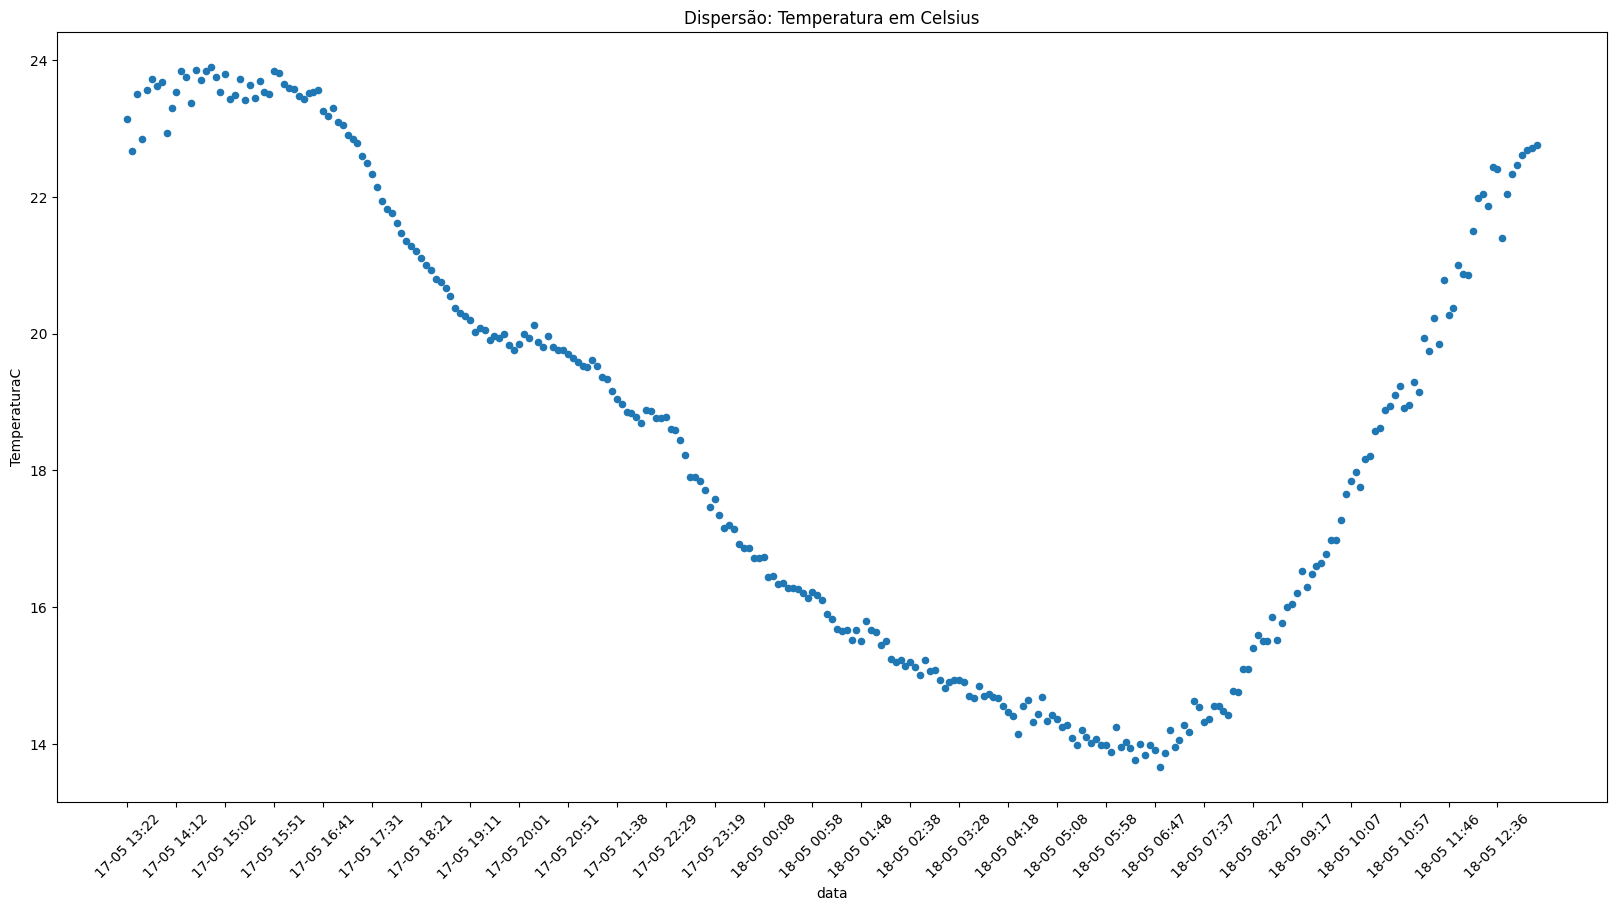

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))

df.plot.scatter(x="data", y="TemperaturaC", ax=ax, title="Dispersão: Temperatura em Celsius")

# Ajuste dos rótulos do eixo x
xticks = ax.get_xticks()
xticklabels = df["data"].values[::10]  # Seleciona a cada 10 rótulos para evitar sobreposição
ax.set_xticks(xticks[::10])
ax.set_xticklabels(xticklabels, rotation=45)

plt.show()

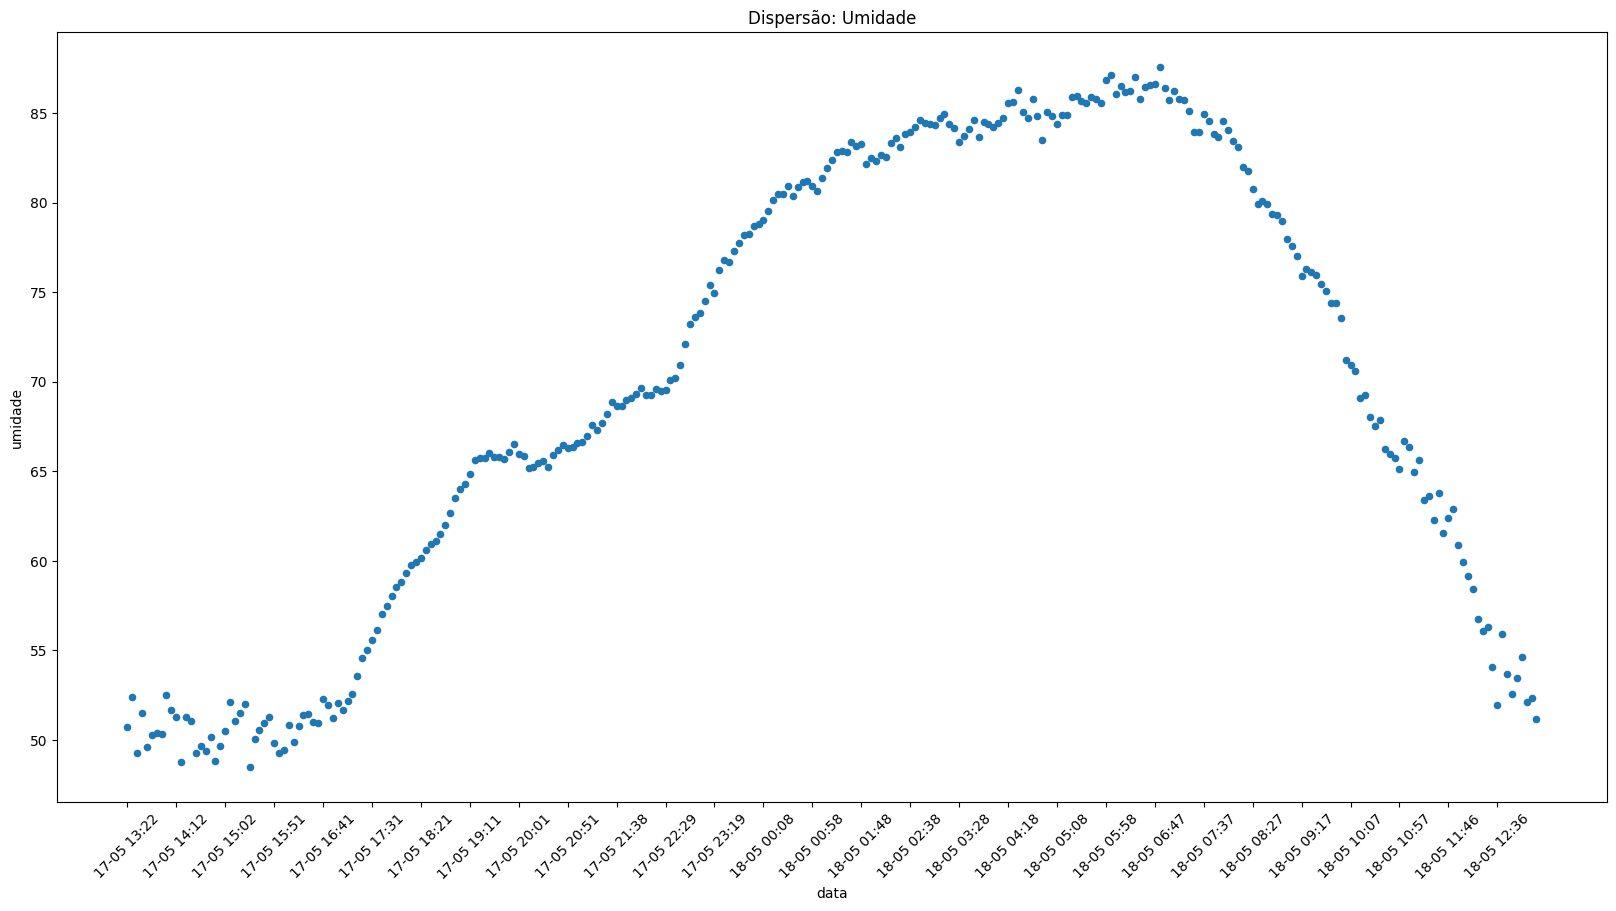

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

df.plot.scatter(x="data", y="umidade", ax=ax, title="Dispersão: Umidade")

# Ajuste dos rótulos do eixo x
xticks = ax.get_xticks()
xticklabels = df["data"].values[::10]  # Seleciona a cada 10 rótulos para evitar sobreposição
ax.set_xticks(xticks[::10])
ax.set_xticklabels(xticklabels, rotation=45)

plt.show()